<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />


Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<hr style="border-top: 1px solid #001a79;" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Creating a array of values for X using Numpy
x = np.arange(-5,6,1)
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [4]:
# Y function for the absolute value
y = abs(x)
y

array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

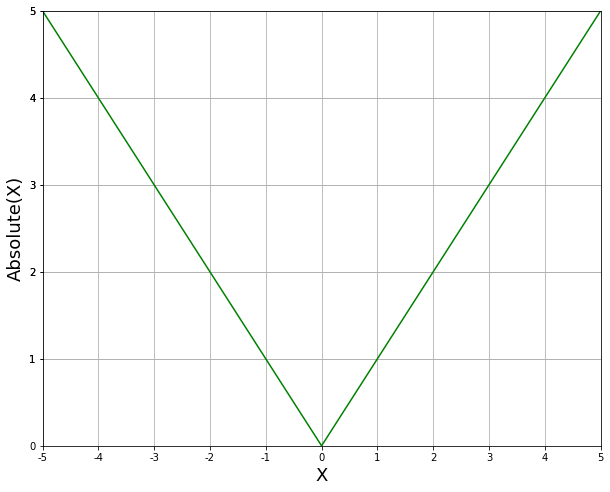

In [5]:
# Creating the plot for the absolute function.

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"g-")
plt.xlabel("X", size="18")
plt.ylabel("Absolute(X)", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot
plt.xlim(left=x[0], right=x[-1])
plt.ylim(bottom=0, top=y[-1])

# Making it easier to see when value of Y for each X
plt.xticks(x,x)
plt.yticks(y,y)
plt.show()

Regarding the reason of why absolute functions are not used is because of the difficulties that mathematicianshave when using derivatives while working with absloute values
<b>Reference:</b> https://www.bradthiessen.com/html5/docs/ols.pdf - Page 4

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />


Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<hr style="border-top: 1px solid #001a79;" />

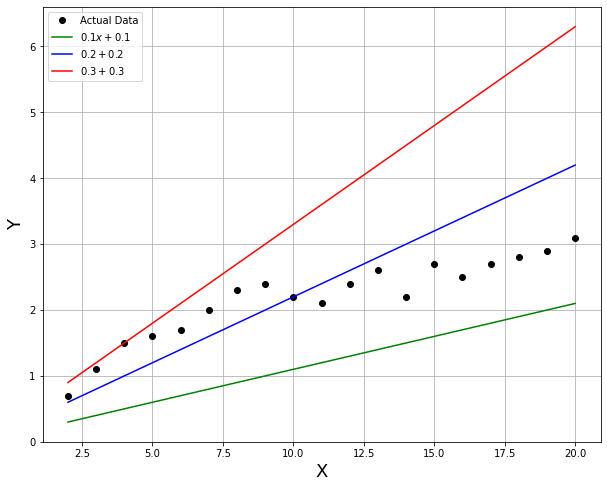

In [57]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#Converting to Numpy arrays to use in the calculations bellow
x = np.array(x)
y = np.array(y)


#Actual values of X and Y

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"ko", label=r"Actual Data")
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot



#Plotting different lines to to try to find the best one

plt.plot(x,(0.1 * x)+ 0.1,"g-", label=r"$0.1x + 0.1$")
plt.plot(x,(0.2 * x)+ 0.2,"b-", label=r"$0.2x + 0.2$")
plt.plot(x,(0.3 * x)+ 0.3,"r-", label=r"$0.3x + 0.3$")

plt.legend()

plt.show()

As we can see in the plot above, the best of the tree lines above, seems to be the blue one. To be sure of that we are going to calculate the cost of each one of them, to see which one has the smaller cost.

The formula to calculate the cost of each model is 
$$ \sum_i (y_i - mx_i - c)^2 $$

In [54]:
# Calculate the cost of the lines above for the data above.



cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])


print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 0.1, cost(0.1, 0.1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.2,  0.2, cost(0.2, 0.2)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.3, 0.3, cost(0.3, 0.3)))

Cost with m =  0.10 and c =  0.10:    19.45
Cost with m =  0.20 and c =  0.20:     7.27
Cost with m =  0.30 and c =  0.30:    61.21


We still can improve, we can try to minimize the cost of the functions above. And in the case of a two dimentional line with few datapoints, we can actually find the best values for m and c. The easiest way is to use the Polyfit function from Numpy.

In [59]:
np.polyfit(x,y,1)

array([0.10315789, 1.04947368])

As seem above the best value for m is 0.10315789 and for c is 1.04947368. Now if we use these values to make a plot, it will show the best possible fit.

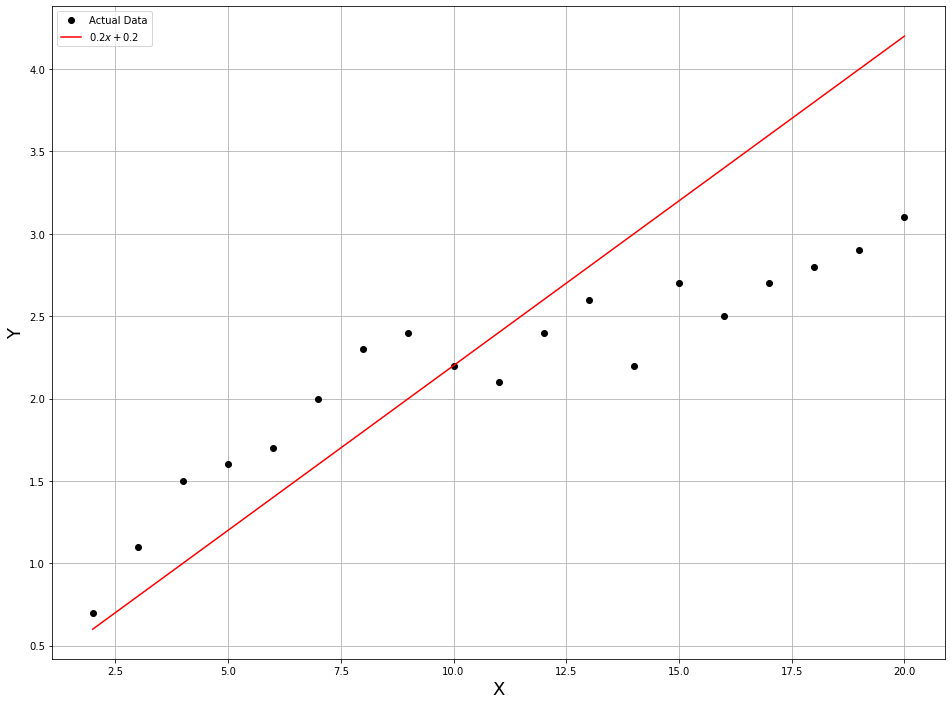

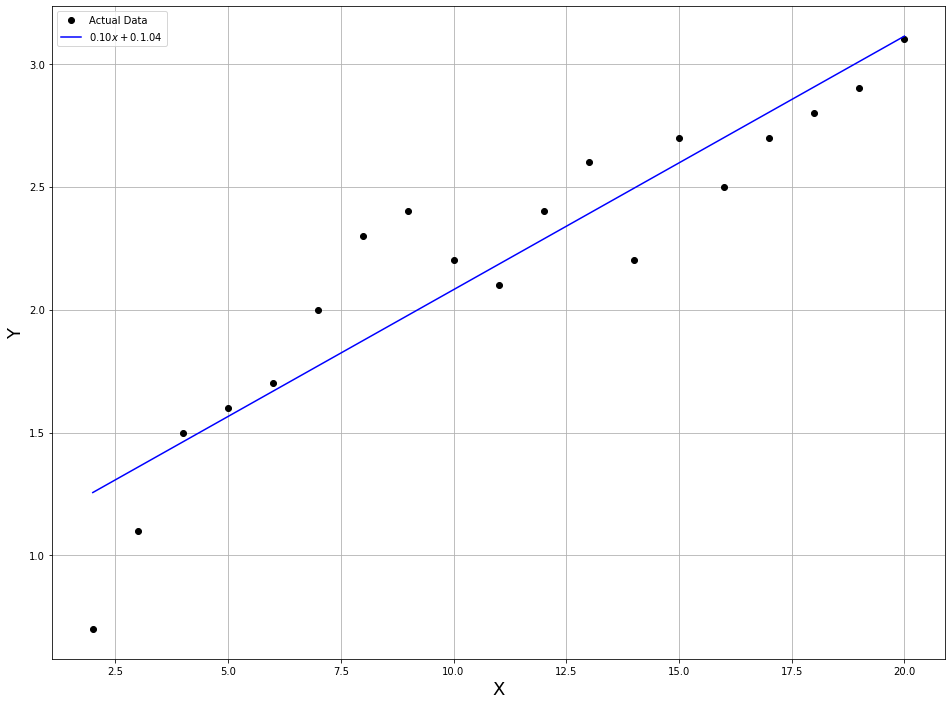

In [76]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#Converting to Numpy arrays to use in the calculations bellow
x = np.array(x)
y = np.array(y)

#Actual values of X and Y

plt.rcParams['figure.figsize'] = (16, 12)
plt.plot(x,y,"ko", label=r"Actual Data")
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,(0.2 * x)+ 0.2,"r-", label=r"$0.2x + 0.2$")

plt.legend()
plt.show()




# Optimized Cost plot

plt.rcParams['figure.figsize'] = (16, 12)
plt.plot(x,y,"ko", label=r"Actual Data")
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,(0.10315789 * x)+ 1.04947368,"b-", label=r"$0.10x + 0.1.04$")

plt.legend()

plt.show()



As seen above, the minimized cost plot line seems to be a better fit. However, is a straight line plot a good model for these data points?